dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa
Mean Squared Error: 0.0000
R² Score: 1.0000


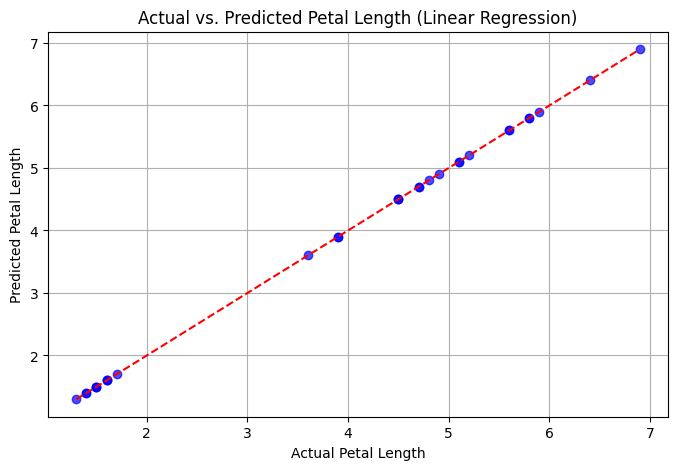

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# بارگیری داده‌های Iris از OpenML
iris = fetch_openml(name="iris", version=1, as_frame=True)
print(iris.keys())
df = iris.frame  # یا df = pd.DataFrame(iris.data) برای ویژگی‌ها


# نمایش ۱۰ سطر اول داده‌ها
print(df.head(10))  

# انتخاب ویژگی‌ها و متغیر هدف
X = df.drop(columns=['class'])  # حذف ویژگی غیرعددی
y = df['petallength']  # متغیر هدف

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ساخت و آموزش مدل
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# پیش‌بینی
y_pred = model.predict(X_test_scaled)

# محاسبه معیارهای ارزیابی
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # خط y=x
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs. Predicted Petal Length (Linear Regression)")
plt.grid()
plt.show()

